In [1]:
#
#  File:
#    chkbay.py
#
#  Synopsis:
#    Draws contours on a triangular mesh.
#
#  Category:
#    Contouring
#
#  Author:
#    Mary Haley
#  
#  Date of initial publication:
#    September, 2004
#
#  Description:
#    This example reads data defined on a triangular
#    mesh and creates colored contour visualizations of 
#    the depth of water in the Chesapeake Bay.
#
#  Effects illustrated:
#    o  Reading from a NetCDF file using Nio.
#    o  Using a named color table.
#    o  Using a cylindrical equidistant map projection.
#    o  How to subset a color map
#    o  How to select a map database resolution.
#    o  How to use function codes in text strings.
# 
#  Output:
#    Two visualizations are produced, the first
#    is a simple contour of the depth field and the
#    second overlays that contour on a map of the
#    Chesapeake Bay.
#
#  Notes:
#    1.)  The grid definition and data came from the 
#         Chesapeake Community Model Program Quoddy model:
#  
#            http://ccmp.chesapeake.org
#    
#         using the NOAA/NOS standardized hydrodynamic 
#         model NetCDF format:
#
#            https://sourceforge.net/projects/oceanmodelfiles
#
#    2.)  If you want high resolution map coastlines you will
#         need to download the appropriate data files, if you
#         have not done so.  For details, see:
#
#            http://www.pyngl.ucar.edu/Graphics/rangs.shtml
#
#

#
#  Import numpy.
#
from __future__ import print_function
import numpy, os

#
#  Import Ngl support functions.
#
import Ngl

#
#  Import Nio for reading netCDF files.
#
import Nio

dirc  = Ngl.pynglpath("data")
cfile = Nio.open_file(os.path.join(dirc,"cdf","ctcbay.nc"))

#
#  Read the lat/lon/ele/depth arrays to numpy.arrays.
#
lat   = cfile.variables["lat"][:]
lon   = cfile.variables["lon"][:]
ele   = cfile.variables["ele"][:]
depth = cfile.variables["depth"][:]

#
#  Open a PNG file
#
wks_type = "png"
wks = Ngl.open_wks(wks_type,"chkbay")

#
#  The next set of resources will apply to the contour plot.
#
resources = Ngl.Resources()

#
# Use a subset of a color map for the colored contours
#
resources.cnFillPalette    = Ngl.read_colormap_file("rainbow+gray")[15:-1,:]

resources.sfXArray         = lon  # Portion of map on which to overlay
resources.sfYArray         = lat  # contour plot.
resources.sfElementNodes   = ele
resources.sfFirstNodeIndex = 1

resources.cnFillOn         = True 
resources.cnLinesOn        = False
resources.cnLineLabelsOn   = False

#
# This plot isn't very interesting because it isn't overlaid on a map.
# We are only creating it so we can retrieve information that we need
# to overlay it on a map plot later. You can turn off this plot
# by setting the nglDraw and nglFrame resources to False.
#
contour = Ngl.contour(wks,depth,resources)

#
#  The next set of resources will apply to the map plot.
#
resources.mpProjection = "CylindricalEquidistant"

#
# Once the high resolution coastline data files have been
# downloaded (see the Notes section above for details), to
# access them you need to change the following resource 
# to "HighRes".
#
resources.mpDataBaseVersion = "MediumRes"

#
# Retrieve the actual lat/lon end points of the scalar array so
# we know where to overlay on map.
#
xs = Ngl.get_float(contour.sffield,"sfXCActualStartF")
xe = Ngl.get_float(contour.sffield,"sfXCActualEndF")
ys = Ngl.get_float(contour.sffield,"sfYCActualStartF")
ye = Ngl.get_float(contour.sffield,"sfYCActualEndF")

resources.mpLimitMode           = "LatLon"
resources.mpMinLonF             = xs     # -77.3244
resources.mpMaxLonF             = xe     # -75.5304
resources.mpMinLatF             = ys     #  36.6342
resources.mpMaxLatF             = ye     #  39.6212

#
# In PyNGL, the "~" character represents a function code. A function
# code signals an operation you want to apply to the following text.
# In this case, ~H10Q~ inserts 10 horizontal spaces before the text,
# and ~C~ causes a line feed (carriage return).
#

resources.tiMainString       = "~H10Q~Chesapeake Bay~C~Bathymetry~H16Q~meters"
resources.lbLabelFontHeightF = 0.02

map = Ngl.contour_map(wks,depth,resources)

Ngl.end()

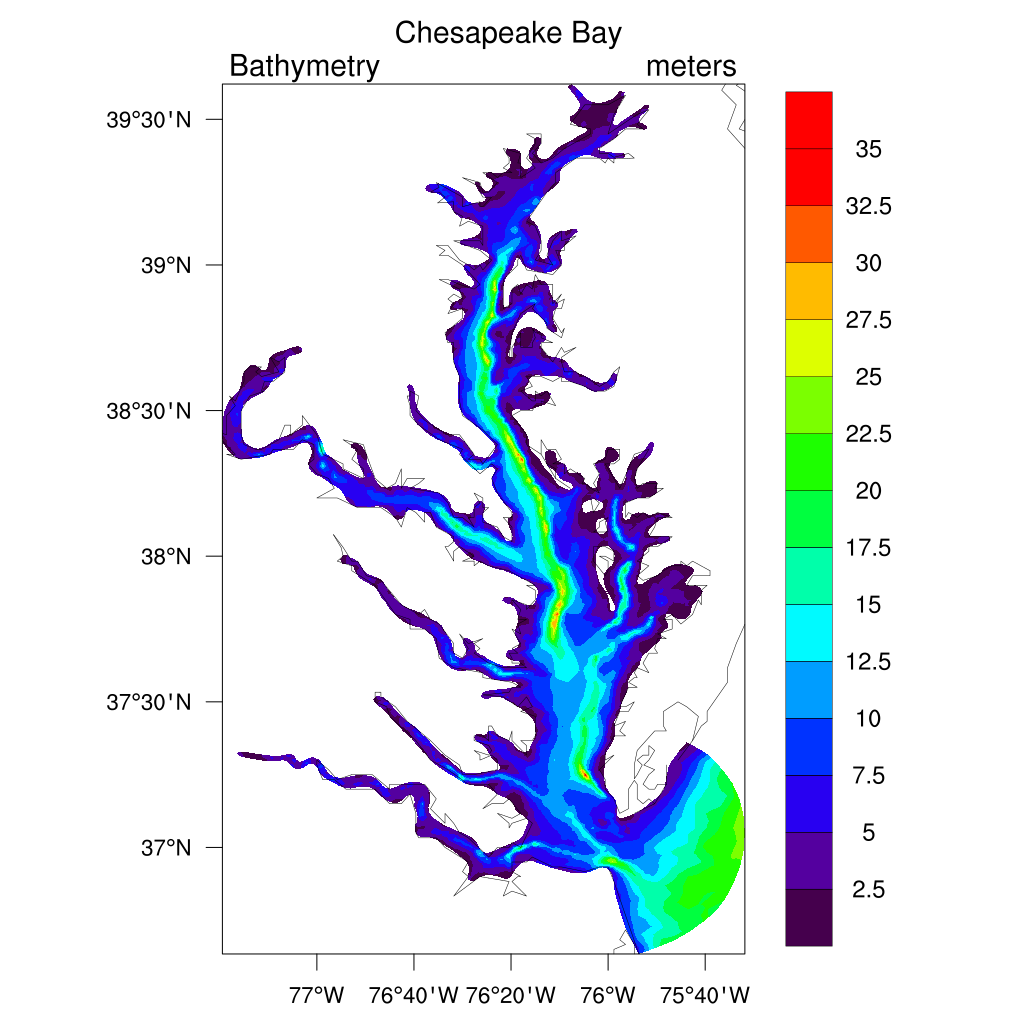